In [20]:
log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log",'r')
loglines = log.readlines()
log.close()

#get index of recent run
startInd = 0
lastRunStart = 0
for line in loglines:
    if "Starting experiments run" in line:
        lastRunStart = startInd
    startInd += 1

expLines = loglines[lastRunStart:]
rowtimes = [line for line in loglines if "Row" in line]
rowtimes

['2021-11-04 12:25:17 WARN  Experiments:181 - Row 1 withUnsub time(ms): 1.782288263E7\n',
 '2021-11-04 12:25:32 WARN  Experiments:181 - Row 1 noUnsub time(ms): 1.1830737558E7\n',
 '2021-11-04 12:26:07 WARN  Experiments:277 - Row 2 badDisable time(ms): 3.0966859613E7\n',
 '2021-11-04 12:27:34 WARN  Experiments:277 - Row 2 disable time(ms): 8.379305005E7\n',
 '2021-11-04 12:27:49 WARN  Experiments:277 - Row 2 noDisable time(ms): 1.1248391753E7\n',
 '2021-11-04 12:38:50 WARN  Experiments:469 - Row 5 withCheck time(ms): 6.57657473501E8\n',
 '2021-11-04 12:39:17 WARN  Experiments:469 - Row 5 noCheck time(ms): 2.3225862984E7\n',
 '2021-11-04 12:43:01 WARN  Experiments:555 - Row 4 Witnessed time(ms): 2.20843803449E8\n']

In [23]:
import matplotlib.pyplot as plt
def parseTime(s):
    return float(s.split(":")[-1].strip())/1000
feasibility_times = [parseTime(line) for line in loglines if "feasibility " in line]
#subsumption time
subsumption_times = [parseTime(line) for line in loglines if "subsumption " in line]
print("feasibility lines: %i" % len(feasibility_times))
print("subsumption lines: %i" % len(subsumption_times))

feasibility lines: 15442
subsumption lines: 2213


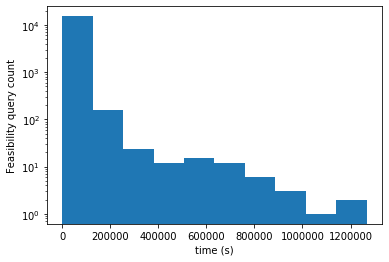

In [26]:
plt.hist(feasibility_times)
plt.xlabel("time (s)")
plt.ylabel("Feasibility query count")
plt.yscale('log')
#plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/feas_time.png")
plt.show()

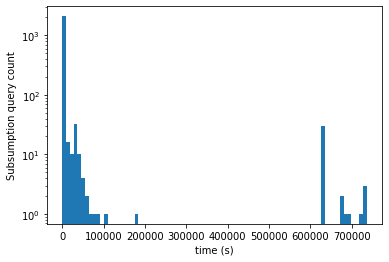

In [27]:
plt.hist(subsumption_times, bins=80)
plt.xlabel("time (s)")
plt.ylabel("Subsumption query count")
plt.yscale('log')
#plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()